# Exploratory Data Analysis
- Experimenting with the data to see what research questions we can develop from it

In [1]:
import project_functions as func
import pandas as pd
import pandas_profiling as pdp
import seaborn as sns
import matplotlib as plt

## Load Data
First thing to do is load the raw data into a Dataframe. 
I have decided to make two dataframes, one with all the errors intact, and another that has been wrangled to contain no collection errors

In [2]:
dfBasic = func.load("../../data/raw/meteorite-landings.csv") # Dataframe including errors
df = func.wrangle(dfBasic) # Dataframe without the errors
sns.set(rc={'figure.figsize':(12,9)})

In [3]:
dfBasic

,Name,ID,Status,Class,Mass (g),Fall,Year,Latitude,Longitude,GeoLocation
0,Aachen,1,Valid,L5,21.0,Observed,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Observed,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Observed,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Observed,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Observed,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [4]:
df

,Name,ID,Status,Class,Mass (g),Fall,Year,Latitude,Longitude,GeoLocation
0,Aachen,1.0,Valid,L5,21.0,Observed,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2.0,Valid,H6,720.0,Observed,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6.0,Valid,EH4,107000.0,Observed,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10.0,Valid,Acapulcoite,1914.0,Observed,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370.0,Valid,L6,780.0,Observed,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
31700,Zillah 002,31356.0,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
31701,Zinder,30409.0,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
31702,Zlin,30410.0,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
31703,Zubkovsky,31357.0,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


## Preliminary data analysis

In [5]:
df.describe()

,ID,Mass (g),Year,Latitude,Longitude
count,31705.000000,3.170500e+04,31705.000000,31705.000000,31705.000000
mean,20751.653272,1.867359e+04,1987.087084,-47.602009,73.452607
std,14974.205352,6.892699e+05,26.791228,46.714171,83.419083
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,9190.000000,6.530000e+00,1983.000000,-79.683330,26.000000
50%,18511.000000,3.007000e+01,1991.000000,-72.000000,57.147030
75%,27300.000000,2.050000e+02,2000.000000,18.393170,159.414820
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000


## Locations of Meterorite Discovery and how they were discovered

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

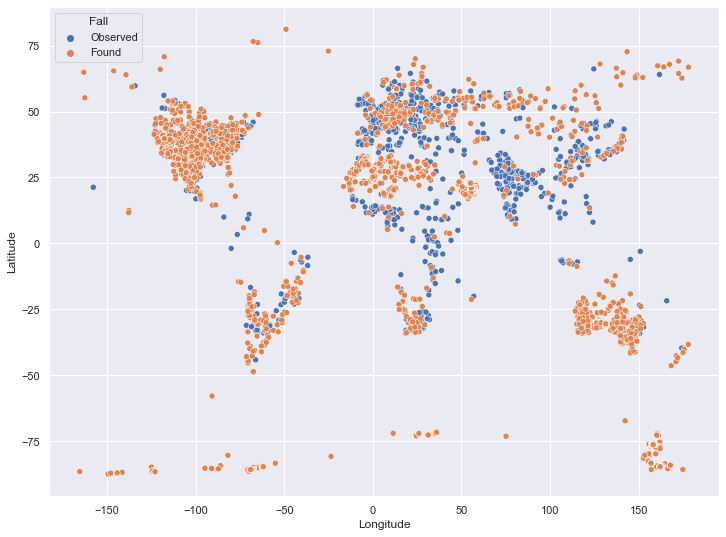

In [6]:
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Fall', palette='deep')

As can be seen from this diagram, the vast majority of meteorites have been found or observed on land, so the outine of the continents is visible only form these loctions. Another thing to note is that the observed meteorites, are more likely to have been seen in heavily populated areas. It would be interesting to create a timeline on a map to see how each has been discovered and in which parts of the world at a time.

##  Histogram of Meterorite Discoveries

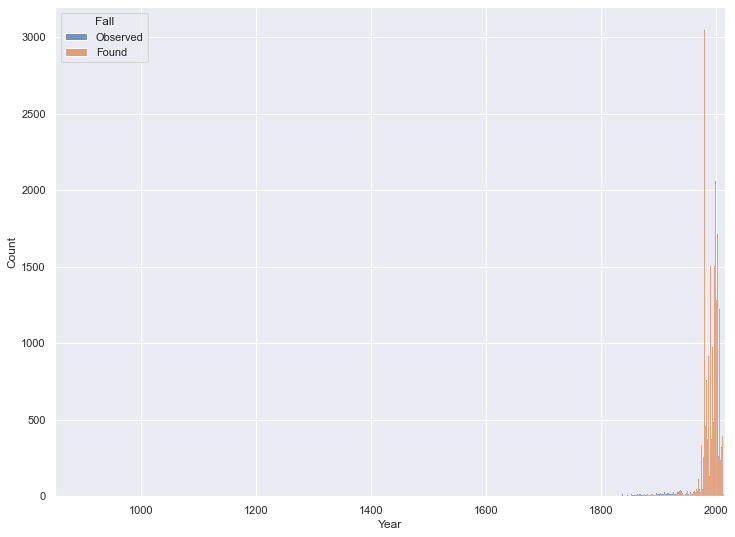

In [7]:
hist = sns.histplot(x='Year', data=df, hue='Fall', multiple='stack').set(xlim=(850, 2015))

The data is heavily skewed, so I'll limit this graph to start at 1800 for better viewing of more recent falls

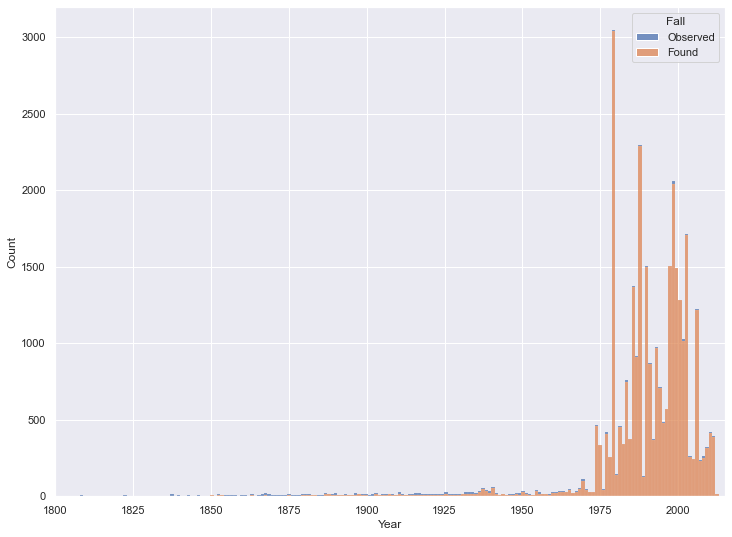

In [8]:
hist = sns.histplot(x='Year', data=df, hue='Fall', multiple='stack').set(xlim=(1800, 2015))

It is much clearer to see the histogram within this range, and the majority of the meteorites have been found around this time period, especially in the late 20th century, with the mean year of discoveries being in **1987** 
(as seen in the pandas profile)

## Mass distribution of Meteorites

In [ ]:
sns.countplot(data=df, y='Mass (g)', y=)